# Admission Predection

In [267]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.metrics import r2_score

In [268]:
# reading csv data file
df = pd.read_csv('D:\Self studying\Data Analytics\Admission_Predict.csv')

In [269]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [271]:
#drop unuseful cols
df.drop('Serial No.', axis = 1, inplace = True)

In [272]:
#show some statistics for better understanding the data
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### in 

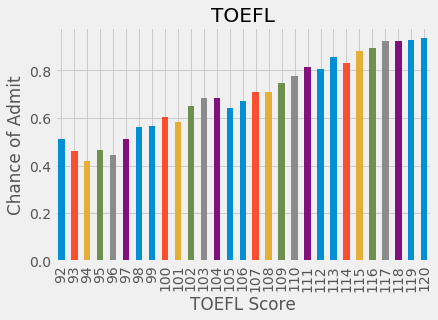

In [273]:
#the effect of TOEFL takers on the chance of admission
plt.style.use('fivethirtyeight')
df.groupby('TOEFL Score')['Chance of Admit '].mean().plot(kind = 'bar')
plt.title('TOEFL')
plt.ylabel('Chance of Admit')
plt.show()

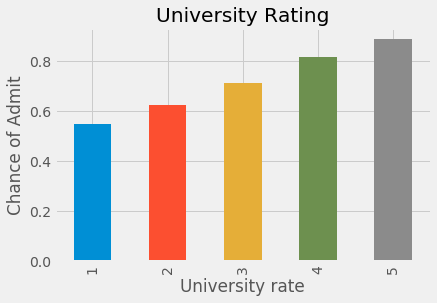

In [274]:
#the effect of University rating on the chance of admission

plt.style.use('fivethirtyeight')
df.groupby('University Rating')['Chance of Admit '].mean().plot(kind = 'bar')
plt.title('University Rating')
plt.ylabel('Chance of Admit')
plt.xlabel('University rate')

plt.show()

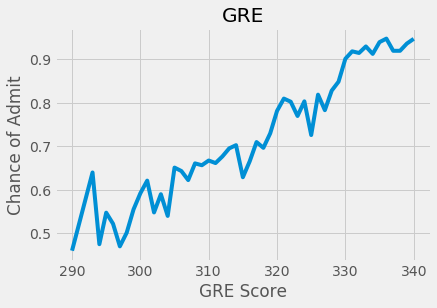

In [275]:
#the effect of GRE takers on the chance of admission

plt.style.use('fivethirtyeight')
df.groupby('GRE Score')['Chance of Admit '].mean().plot(kind = 'line')
plt.title('GRE')
plt.ylabel('Chance of Admit')
plt.show()

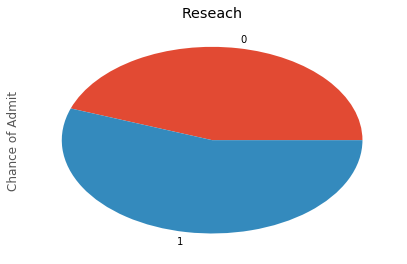

In [276]:
#the relation of research and the chance of admission

plt.style.use('ggplot')
df.groupby('Research')['Chance of Admit '].mean().plot(kind = 'pie')
plt.title('Reseach')
plt.ylabel('Chance of Admit')
plt.show()

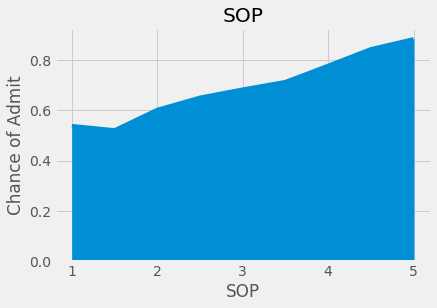

In [299]:
#the relation of SOP and the chance of admission

plt.style.use('fivethirtyeight')
df.groupby('SOP')['Chance of Admit '].mean().plot(kind = 'area')
plt.title('SOP')
plt.ylabel('Chance of Admit')
plt.show()

In [277]:
#some useful statistics for getting the average of chance of admission
df.groupby(['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'])['Chance of Admit '].mean().sort_values().tail()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
340        120          4                  5.0  5.0   9.50  1           0.96
334        120          5                  4.0  5.0   9.87  1           0.97
340        120          4                  4.5  4.0   9.92  1           0.97
336        119          5                  4.0  3.5   9.80  1           0.97
340        120          5                  4.5  4.5   9.91  1           0.97
Name: Chance of Admit , dtype: float64

In [278]:
#applying multiple linear regression
model = linear_model.LinearRegression()

In [279]:
#isolate the labels from the data
X = df.iloc[:,0:7]
y = df['Chance of Admit ']

In [280]:
#splitting the data into training, testing data with 20%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [281]:
#fitting the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [282]:
#get the predictions
y_prediction = model.predict(X_test)

In [283]:
#the r^2 (correlation of determination)
score=model.score(X_test, y_test)

In [284]:
score

0.8212082591486989

In [348]:
#forecating chance of admission function 
def predict(GRE,TOEFL,Rate,SOP,LOR,CGPA,Research, model):
    result = model.predict([[GRE,TOEFL,Rate,SOP,LOR,CGPA,Research]])
    return result

In [369]:
print("your chance of admission is : "+str((predict(310,125,5,4.0,1,10,1,model)*100)))

your chance of admission is : [90.80103013]
